In [ ]:
import json
import pandas
import order_independent_llm
import glob
import seaborn
import matplotlib.pyplot as plt

In [2]:
targets = glob.glob("../results/csqa/*.jsonl")

In [3]:
df = pandas.concat([order_independent_llm.load_to_dataframe(t,fail_on_empty=False) for t in targets])

In [4]:
df_piv = df[['model','is_correct_answer','response_type']].groupby(['model','response_type']).mean().reset_index().pivot(
    index = 'model',
    columns='response_type',
    values='is_correct_answer'
)[['normal', 'order_independent', 'normal_reversed', 'only_parallel_attention',
       'only_parallel_attention_reversed', 'only_parallel_position',
       'only_parallel_position_reversed']]
df_piv

response_type,normal,order_independent,normal_reversed,only_parallel_attention,only_parallel_attention_reversed,only_parallel_position,only_parallel_position_reversed
model,,,,,,,
WizardLM/WizardLM-7B-V1.0,0.266181,0.265372,0.266181,0.265372,0.265372,0.266181,0.266181
gpt2,0.201036,0.202919,0.196328,0.203390,0.201742,0.201036,0.196328
lmsys/vicuna-7b-v1.5,1.000000,0.500000,0.500000,0.500000,0.500000,1.000000,0.500000
meta-llama/Llama-2-13b-chat-hf,0.857143,0.714286,0.571429,0.857143,0.571429,0.571429,0.428571
meta-llama/Llama-2-13b-hf,0.372093,0.302326,0.302326,0.255814,0.232558,0.325581,0.348837
meta-llama/Llama-2-7b-chat-hf,0.363636,0.409091,0.681818,0.409091,0.318182,0.136364,0.363636
meta-llama/Llama-2-7b-hf,0.231598,0.265709,0.219031,0.256732,0.240575,0.256732,0.258528


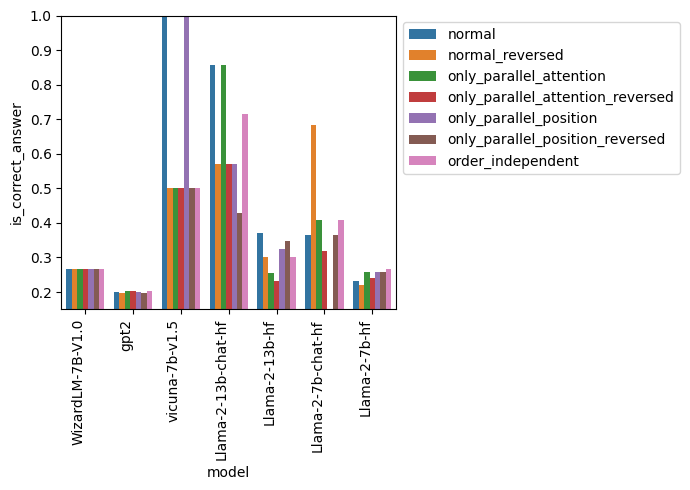

In [8]:
fig, ax  = plt.subplots(figsize = (7,5))
seaborn.barplot(
    hue = 'response_type',
    x = 'model',
    y ='is_correct_answer',
    data = df[['model','is_correct_answer','response_type']].groupby(['model','response_type']).mean().reset_index(),
    ax = ax
)
ax.set_ylim([.15,1])
ax.set_xticklabels([l._text.split('/')[-1] for l in ax.get_xticklabels()], rotation=90, ha='right')
ax.legend(bbox_to_anchor=(1,1),loc = 'upper left')
fig.tight_layout()
plt.savefig('./images/csqa_accuracy.pdf', )

In [12]:
df[['model','is_correct_answer','response_type']].groupby(['model','response_type']).mean().reset_index()

,model,response_type,is_correct_answer
0,WizardLM/WizardLM-7B-V1.0,normal,0.325153
1,WizardLM/WizardLM-7B-V1.0,normal_reversed,0.325153
2,WizardLM/WizardLM-7B-V1.0,only_parallel_attention,0.325153
3,WizardLM/WizardLM-7B-V1.0,only_parallel_attention_reversed,0.325153
4,WizardLM/WizardLM-7B-V1.0,only_parallel_position,0.325153
5,WizardLM/WizardLM-7B-V1.0,only_parallel_position_reversed,0.325153
6,WizardLM/WizardLM-7B-V1.0,order_independent,0.325153
7,gpt2,normal,0.198529
8,gpt2,normal_reversed,0.194853
9,gpt2,only_parallel_attention,0.216912


In [6]:
with open("tables/CSQA-results.tex" , 'wt') as f:
    f.write(df_piv[['normal', 'order_independent', 'normal_reversed']].to_latex(
        float_format = "%.3f",
        escape=True
    ).replace("response_type", "response\_type"))
    
with open("tables/CSQA-results-variations1.tex" , 'wt') as f:
    f.write(df_piv[['normal', 'order_independent', 'only_parallel_attention',
       'only_parallel_attention_reversed',]].to_latex(
        float_format = "%.3f",
        escape=True
    ).replace("response_type", "response\_type"))
with open("tables/CSQA-results-variations2.tex" , 'wt') as f:
    f.write(df_piv[['normal', 'order_independent', 'only_parallel_position',
       'only_parallel_position_reversed',]].to_latex(
        float_format = "%.3f",
        escape=True
    ).replace("response_type", "response\_type"))
    